# Universal Adversarial Perturbation

### Python Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from PIL import Image
from attack import data_input_init, get_model, universal_adversarial_perturbation, get_fooling_rate
from tqdm import tqdm

In [8]:
device=('cuda' if torch.cuda.is_available() else 'cpu')

### Loading list of Image paths

## Testing on Precomputed Perturbation Matrix

### Loading Model

In [9]:
noise=torch.load('noise.pth')
model=get_model('vgg16',device)

In [10]:
cur_img = tf(Image.open('data/dog.560.jpg'))
cur_img=cur_img.to(device)
cur_img=cur_img.unsqueeze(0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


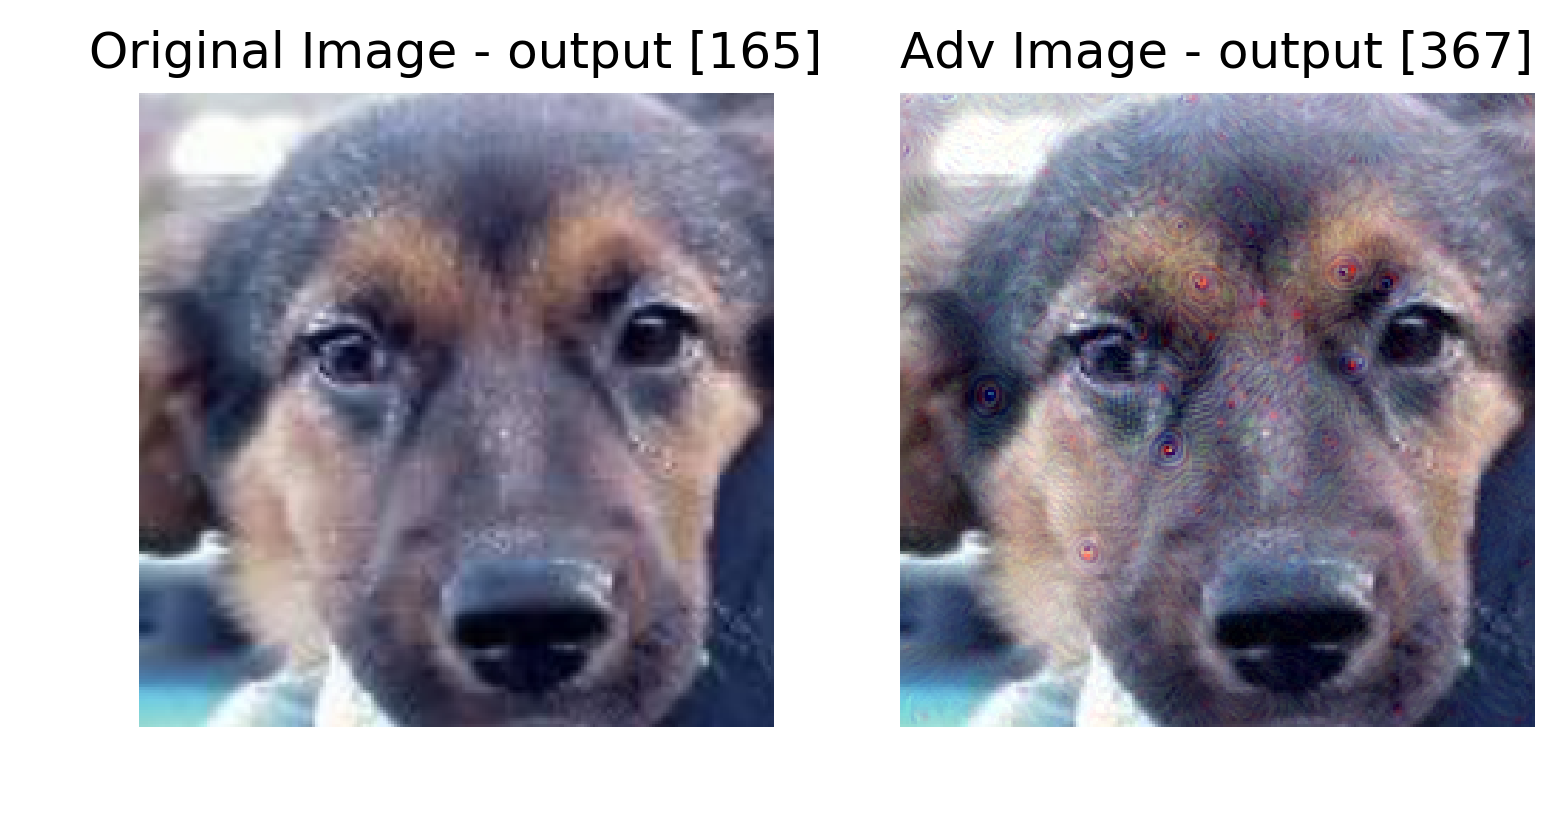

In [11]:
output=model(cur_img)
_,pred=torch.max(output,1)
output=model(cur_img+noise)
_,adv_pred=torch.max(output,1)
plt.figure(dpi=300)
plt.subplot(121)
plt.axis('off')
plt.imshow(cur_img[0].permute(1,2,0).cpu().numpy()*std+mean)
plt.title('Original Image - output '+str(pred.cpu().numpy()))
plt.subplot(122)
plt.axis('off')
plt.imshow((cur_img+noise)[0].detach().permute(1,2,0).cpu().numpy()*std+mean)
plt.title('Adv Image - output '+str(adv_pred.cpu().numpy()))
plt.show()

### Visualizing the Perturbation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


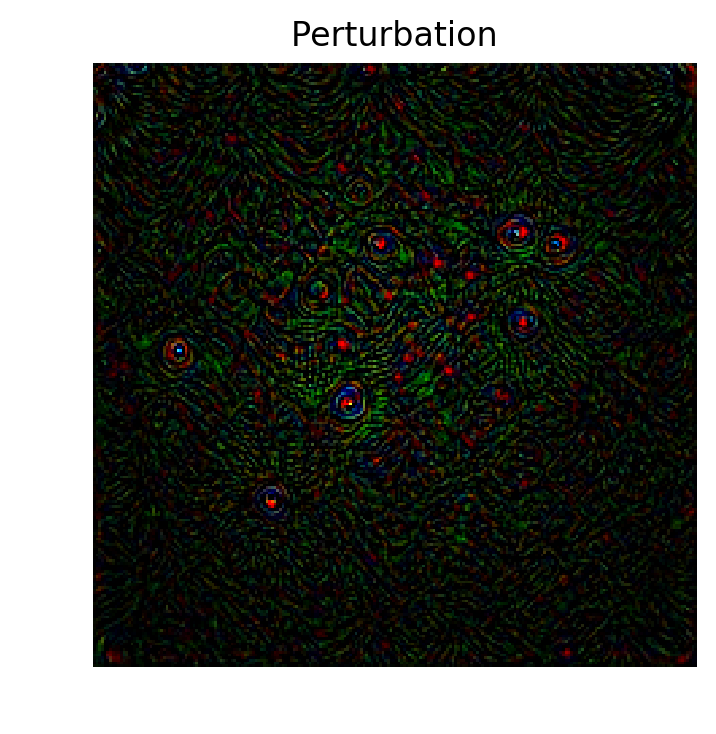

In [12]:
plt.figure(dpi=200)
plt.imshow(noise[0].detach().permute(1,2,0).cpu().numpy())
plt.title('Perturbation')
plt.axis('off')
plt.show()

# Computing New Perturbation

In [8]:
model=get_model('vgg16',device)

In [9]:
noise=universal_adversarial_perturbation(img_names,model, device)
torch.save(noise,'noise.pth')

100%|██████████| 6000/6000 [01:43<00:00, 58.03it/s]

Fooling Rate =  0.9733333333333334


### Visualizing the new universal perturbation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


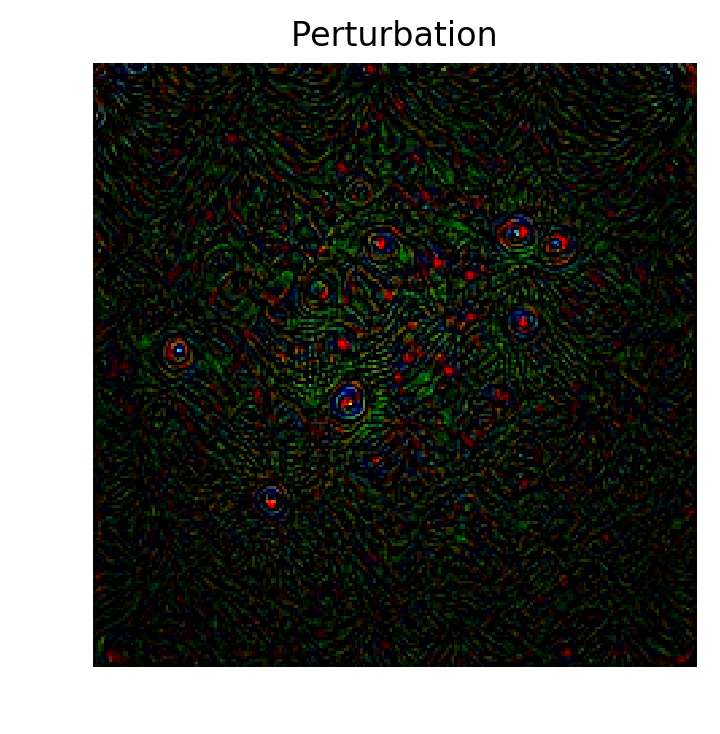

In [10]:
plt.figure(dpi=200)
plt.imshow(noise[0].detach().permute(1,2,0).cpu().numpy())
plt.title('Perturbation')
plt.axis('off')
plt.show()

### Testing blackbox attack on ResNet18

In [11]:
model=get_model('resnet18',device)
fooling_rate,model = get_fooling_rate(img_names,noise,model, device)

100%|██████████| 6000/6000 [01:13<00:00, 81.57it/s]

Fooling Rate =  0.43266666666666664
